# MNIST Handwritten Digit Classification using CNN


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import mnist

<a id="1"></a>
## Loading the Data Set
* In this part we load and visualize the data.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


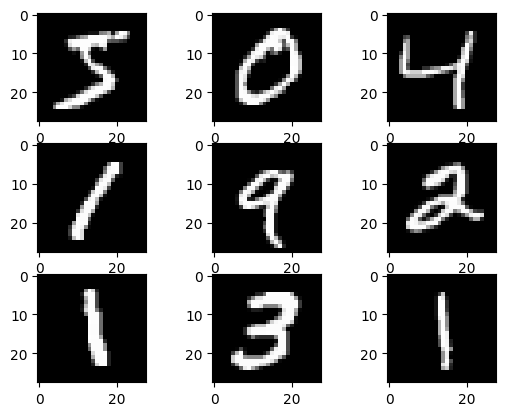

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.

<a id="2"></a>
## Normalization, Reshape and Label Encoding
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28)
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
* Label Encoding  
    * Encode labels to one hot vectors
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [ ]:
# Normalize the data
trainX = trainX / 255.0
testX = testX / 255.0
print("trainX shape: ",trainX.shape)
print("test shape: ",testX.shape)

trainX shape:  (60000, 28, 28)
test shape:  (10000, 28, 28)


In [ ]:
# Reshape
trainX = trainX.reshape(-1,28,28,1)
testX = testX.reshape(-1,28,28,1)
print("trainX shape: ",trainX.shape)
print("test shape: ",testX.shape)

trainX shape:  (60000, 28, 28, 1)
test shape:  (10000, 28, 28, 1)


In [ ]:
# Label Encoding
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
trainy = to_categorical(trainy, num_classes = 10)
testy = to_categorical(testy, num_classes = 10)

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
trainX, train_val, trainy, valy = train_test_split(trainX, trainy, test_size = 0.1, random_state=2)

In [ ]:
trainX.shape

(54000, 28, 28, 1)

<a id="4"></a>
## Convolutional Neural Network
* CNN is used for image classification, object detection
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="11"></a>
### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

Let's start to build the model, we'll build a simple model with Sequential().
- Sequential(): an object that groups layers together in a linear stack
- If we want to add layers dynamically, we can use .add() and .pop() to add and pop layers on/off our model. This would be useful, for example, if we wanted to loop through a list of values and add layers with those values.

### Layers

Keras has many pre-defined layers that we can use:

- Dense(): A basic densely connected layer with units nodes. Densely connected means that every node in the previous layer is connected to every node in the current layer.
- Activation(): applies an activation function (defined by the activation argument) to the values coming into it.
- Dropout (): disregarding certain nodes in a layer at random
- Flatten (): converting the data into a 1-dimensional array for inputting it to the next layer.



In [ ]:
#
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
# from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<a id="12"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate


In [ ]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

<a id="13"></a>
### Loss Function
* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="14"></a>
### Epochs and Batch Size
* Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.
* reference: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks

In [ ]:
epochs = 5  # for better result increase the epochs
batch_size = 250

In [ ]:
history = model.fit(x=trainX,y=trainy, batch_size=batch_size,epochs = epochs, validation_data = (train_val,valy))

Epoch 1/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6278 - loss: 1.1177 - val_accuracy: 0.9485 - val_loss: 0.1683
Epoch 2/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9242 - loss: 0.2468 - val_accuracy: 0.9708 - val_loss: 0.0980
Epoch 3/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9468 - loss: 0.1690 - val_accuracy: 0.9745 - val_loss: 0.0774
Epoch 4/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9554 - loss: 0.1450 - val_accuracy: 0.9790 - val_loss: 0.0651
Epoch 5/5
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9603 - loss: 0.1277 - val_accuracy: 0.9820 - val_loss: 0.0555


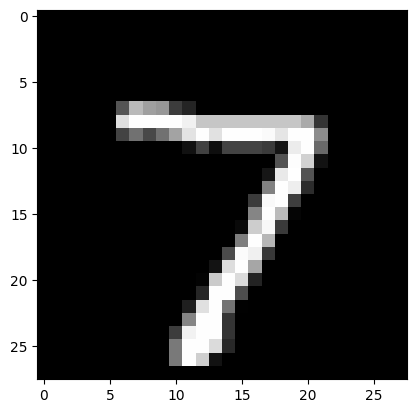

In [ ]:
### Let's test the images in test dataset, we pick the first image

plt.imshow(testX[0], cmap="gray") # Import the image
plt.show() # Plot the image

### model Prediction

In [ ]:
Y_pred = model.predict(testX)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(np.argmax(Y_pred[0])) # Print out the predicted number for the first image

7


Congratulations, The predicted number is also 7, The prediction is correct!!!

We can check how well the trained model is

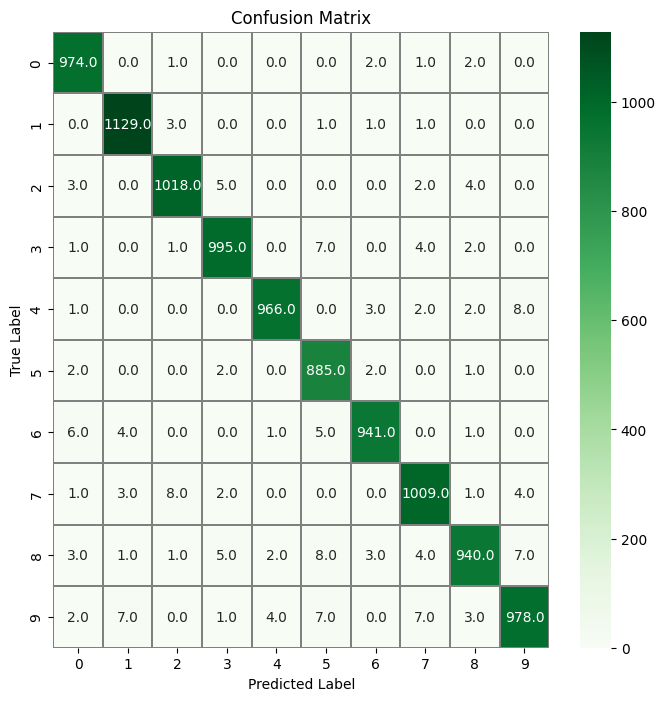

In [ ]:
# confusion matrix
import seaborn as sns
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(testy,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
### calculate accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(Y_true, Y_pred_classes)

0.9835

# Challenges

Build a simpler ConvNet with your choice of architecture  that includes:

- 1 Conv layer
- relu activation for your Conv layer
- 1 pooling layer
- has at least 1 Dense layer with a softmax activation to make the final prediction about which digit it is

Train your model and check the prediction performance

In [ ]:
# Create your simpler ConvNet here:
myModel = Sequential()

# Step 1: Add a Convolution Layer


# Step 2: Add a Relu Activation for the Convolution Layer


# Step 3: Add a Pooling Layer


# Step 4: Add at least 1 Dense Layer with a SoftMax Activation


In [1]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
myModel.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Fit the model
history = myModel.fit(x=trainX,y=trainy, batch_size=batch_size,epochs = epochs, validation_data = (train_val,valy))

# Model Prediction
Y_pred = model.predict(testX)
print(np.argmax(Y_pred[0]))